### Autoencoder on CIFAR10 Dataset 

---

**Problem Statement** - The CIFAR-10 dataset
- The goal of this problem is to run autoencoder on CIFAR10 dataset and see the reconstructed images using AE. 
- Solve all the questions

![](https://drive.google.com/uc?id=1tfGM814gAroyOGNdu2kioEmljiZs16qa)


**Dataset**
- Total Images : 60,000
- Train Images : 50,000
- Test Images : 10,000
- Images/ Class : 6,000
- Image Size : 32 X 32

<br>

- Classes (in order):
    - 'Airplane'
    - 'Automobiler'
    - 'Bird'
    - 'Cat'
    - 'Deer'
    - 'Dog',
    - 'Frog'
    - 'Horse'
    - Ship'
    - 'Truck '

---

**Question 1**
- A - Load CIFAR-10 data from Keras Library. And Split the same into Train and Test

<br>

- B - Normalize the Data
    - Hint
    > - take the X train and convert it into float32
    > - Normalize the data with dividing pixel values with 255

---

**Question 2** 
- A - Define the Encoder
    - Hint
    > - Input shape be: (32,32,3)
    > - First ConvLayer:
        - Conv2D Layer with 64 Filters of (3,3)
        - BatchNormalization layer
        - Relu Activation
        - 2D MaxpoolingLayer with (2,2) filter
    > - Second Layer:
        - Conv2d layer with 16 filters (3,3)
        - BatchNormalization layer
        - Relu Activation
    > - Final Encoded as MaxPool with (2,2) with all previous layers

<br>

- B - Define the Decoder as
    - Hint
    > - Input shape be: encoder output
    > - First ConvLayer:
        - Conv2D Layer with 16 Filters of (3,3)
        - BatchNormalization layer
        - Relu Activation
        - UpSampling2D with (2,2) filter
    > - Second Layer:
        - Conv2D Layer with 32 Filters of (3,3)
        - BatchNormalization layer
        - Relu Activation
        - UpSampling2D with (2,2) filter
    > - Final Decoded as Sigmoid with all previous layers

---

**Question 3** - Compile and fit model:
- Hint
    - Model:
    - Pass input_img, decoded
        - model = Model(input_img, decoded)
    - Compile:
        - Optimizer: "adam"
        - Loss = "binary_crossentropy"
    - Fit:
        - batch_size = 1000
        - epochs = 50

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Conv2D, BatchNormalization, UpSampling2D, MaxPooling2D
from keras.models import Model
from keras.utils import plot_model

Using TensorFlow backend.


### Question-1

In [0]:
# Loading CIFAR-10 dataset
from keras.datasets import cifar10

Ideally we don't need **trainY** and **testY** because we're discarding the labels (since we're only interested in encoding/decoding the input images)

In [0]:
# Split the dataset in to Train and Test
(trainX, trainY), (testX, testY) = cifar10.load_data()

In [5]:
# Summarize loaded dataset
print('Train X = %s \nTrain Y = %s' % (trainX.shape, trainY.shape))
print('Test X = %s \nTest Y = %s' % (testX.shape, testY.shape))

Train X = (50000, 32, 32, 3) 
Train Y = (50000, 1)
Test X = (10000, 32, 32, 3) 
Test Y = (10000, 1)


In [0]:
# Convert from integers to floats
trainX = trainX.astype('float32')
testX = testX.astype('float32')

In [0]:
# Normalize
trainX = trainX.astype('float32') / 255
testX = testX.astype('float32') / 255

### Question-2

- Encoder
    > - Input shape: (32,32,3)
    > - First ConvLayer:
        - Conv2D Layer with 64 Filters of (3,3)
        - BatchNormalization layer
        - Relu Activation
        - 2D MaxpoolingLayer with (2,2) filter
    > - Second Layer:
        - Conv2d layer with 16 filters (3,3)
        - BatchNormalization layer
        - Relu Activation
    > - Final Encoded as MaxPool with (2,2) with all previous layers

In [0]:
# placeholders for the input
input_image = Input(shape=(32, 32, 3))

In [0]:
# Convolutional Encoder

# first convolutional layer
conv1_1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_image)
BatchNormalization()
mpool1_1 = MaxPooling2D((2, 2), padding='same')(conv1_1)

# second convolutional
conv1_2 = Conv2D(16, (3, 3), activation='relu', padding='same')(mpool1_1)
BatchNormalization()

encoder = MaxPooling2D((2, 2), padding='same')(conv1_2)

- Decoder
    > - Input shape: encoder output
    > - First ConvLayer:
        - Conv2D Layer with 16 Filters of (3,3)
        - BatchNormalization layer
        - Relu Activation
        - UpSampling2D with (2,2) filter
    > - Second Layer:
        - Conv2D Layer with 32 Filters of (3,3)
        - BatchNormalization layer
        - Relu Activation
        - UpSampling2D with (2,2) filter
    > - Final Decoded as Sigmoid with all previous layers

In [0]:
# Convolutional Decoder

# first convolutional layer
conv2_1 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoder)
BatchNormalization()
up1_1 = UpSampling2D((2, 2))(conv2_1)

# second convolutional layer
conv2_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1_1)
BatchNormalization()
up2_1 = UpSampling2D((2, 2))(conv2_2)

decoder = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(up2_1)

### Question 3 - Compile and fit model:
- Model:
- Pass input_img, decoded
    - model = Model(input_img, decoded)
- Compile:
    - Optimizer: "adam"
    - Loss = "binary_crossentropy"
- Fit:
    - batch_size = 1000
    - epochs = 50

In [0]:
# the model that takes an input image and
# returns the images generated by the decoder, which is reconstructed images

model = Model(input_image, decoder)

In [0]:
# compile
model.compile(optimizer='adam', loss='binary_crossentropy')

In [13]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 16)        9232      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 16)          2320      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 16, 16, 16)        0   

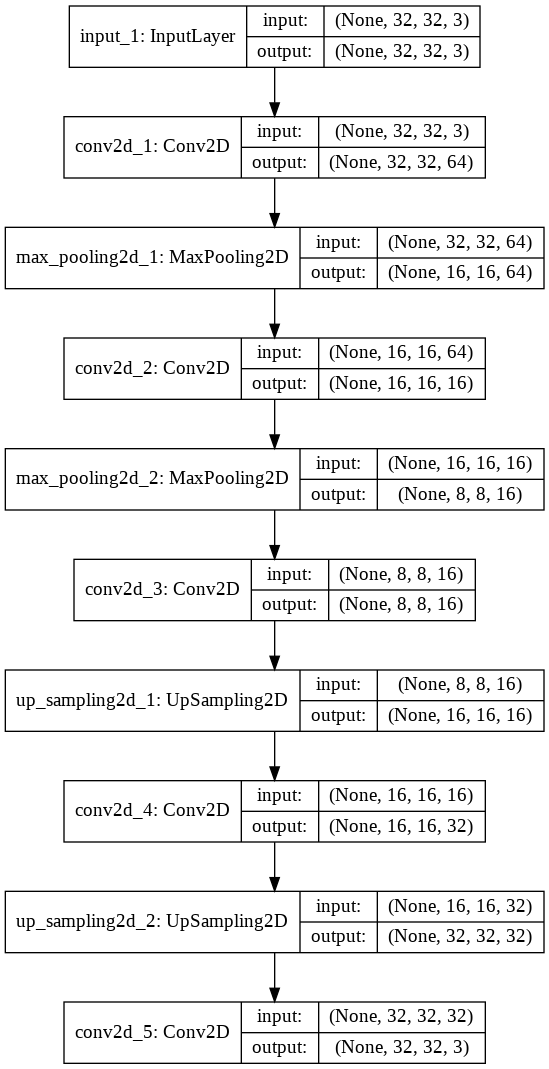

In [14]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, expand_nested=True)

In [0]:
# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot

# SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [16]:
history = model.fit(trainX, trainX,
                    epochs=50,
                    batch_size=1000,
                    shuffle=True,
                    verbose=2,
                    validation_data=(testX, testX)
                    )

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
 - 5s - loss: 0.6280 - val_loss: 0.5907
Epoch 2/50
 - 3s - loss: 0.5841 - val_loss: 0.5805
Epoch 3/50
 - 3s - loss: 0.5776 - val_loss: 0.5763
Epoch 4/50
 - 3s - loss: 0.5738 - val_loss: 0.5734
Epoch 5/50
 - 3s - loss: 0.5712 - val_loss: 0.5712
Epoch 6/50
 - 3s - loss: 0.5693 - val_loss: 0.5689
Epoch 7/50
 - 3s - loss: 0.5678 - val_loss: 0.5677
Epoch 8/50
 - 3s - loss: 0.5668 - val_loss: 0.5669
Epoch 9/50
 - 3s - loss: 0.5658 - val_loss: 0.5661
Epoch 10/50
 - 3s - loss: 0.5654 - val_loss: 0.5657
Epoch 11/50
 - 3s - loss: 0.5646 - val_loss: 0.5665
Epoch 12/50
 - 3s - loss: 0.5643 - val_loss: 0.5650
Epoch 13/50
 - 3s - loss: 0.5640 - val_loss: 0.5647
Epoch 14/50
 - 3s - loss: 0.5636 - val_loss: 0.5641
Epoch 15/50
 - 3s - loss: 0.5632 - val_loss: 0.5638
Epoch 16/50
 - 3s - loss: 0.5636 - val_loss: 0.5636
Epoch 17/50
 - 3s - loss: 0.5626 - val_loss: 0.5635
Epoch 18/50
 - 3s - loss: 0.5626 - val_loss: 0.5636
Epoch 19/50
 - 3s - los

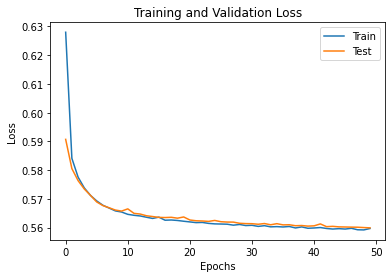

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()